In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.cluster import KMeans


def KMeans_init_centroids(X, K):
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

def compute_centroids(X, idx, K):
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for i in range(len(X)):
        centroids[idx[i]] += X[i]
    points = np.zeros(K)
    for i in range(len(X)):
        points[idx[i]] += 1
    for i in range(len(centroids)):    
        centroids[i] /= points[i]
    
    return centroids

def find_closest_centroids(X, centroids):
    # Set K
    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)
 
    for i in range(len(X)):
        mini = np.linalg.norm(X[i]-centroids[0])
        idx[i] = 0
        for j in range(len(centroids)):
            if(np.linalg.norm(X[i]-centroids[j])<mini):
                mini = np.linalg.norm(X[i]-centroids[j])
                idx[i] = j
    
    return idx

def run_KMeans(X, initial_centroids, max_iters=10):

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
            
        # Computing new centroids
        centroids = compute_centroids(X, idx, K) 
    return centroids, idx

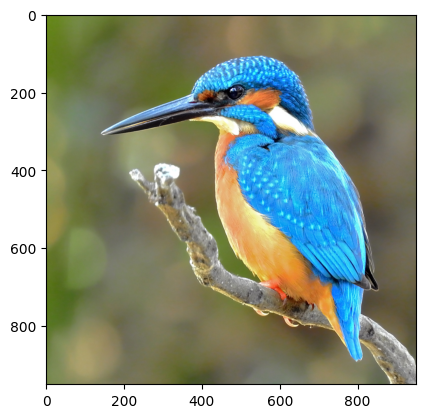

In [14]:
original_img = plt.imread('kingfisher.jpg')
plt.imshow(original_img)

In [16]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (950, 950, 3)


In [17]:
original_img = original_img / 255
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

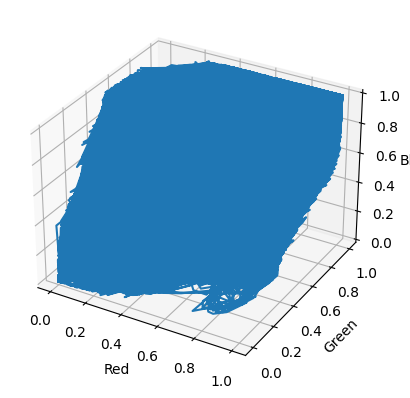

In [18]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot3D(X_img[:,0], X_img[:,1], X_img[:,2])
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel(r'Blue')
plt.show()

In [9]:
K = 32
max_iters = 10
# Using the function which is implemented above. 
initial_centroids = KMeans_init_centroids(X_img, K)

# Run K-Means 
centroids, idx = run_KMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [11]:
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

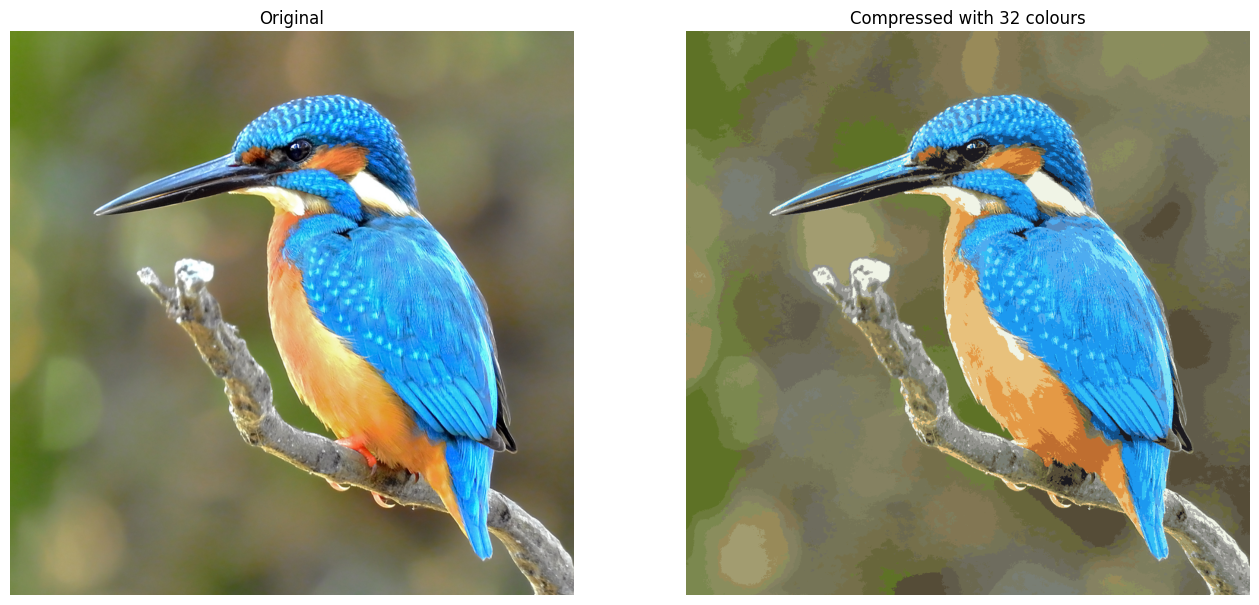

In [12]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

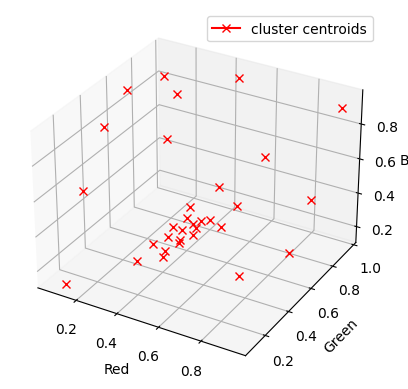

In [13]:
# display cluster centroids
fig = plt.figure()
ax = plt.axes(projection ='3d')
for i in range(len(centroids)):
  ax.plot3D(centroids[i][0], centroids[i][1], centroids[i][2],marker='x',color="red",label="cluster centroids")
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel(r'Blue')
ax.legend(["cluster centroids"])
plt.show()

